In [1]:
from astropy.nddata import CCDData
from drpy.twodspec.longslit import trace

In [2]:
data_arr = CCDData.read('./image0046.fits', unit='adu').data

data_arr_rolled = np.roll(data_arr, 3, axis=0)

diff = np.abs(data_arr - data_arr_rolled)

# diff = np.where(diff > 1000, 1, 0)

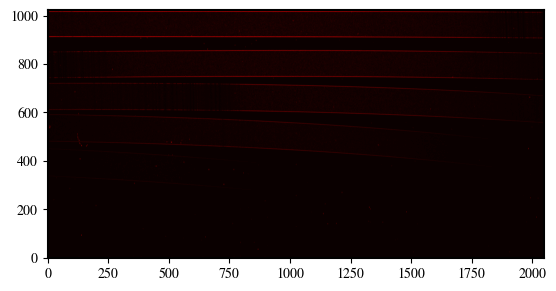

In [3]:
plt.imshow(diff, origin='lower', cmap='hot')
plt.show()

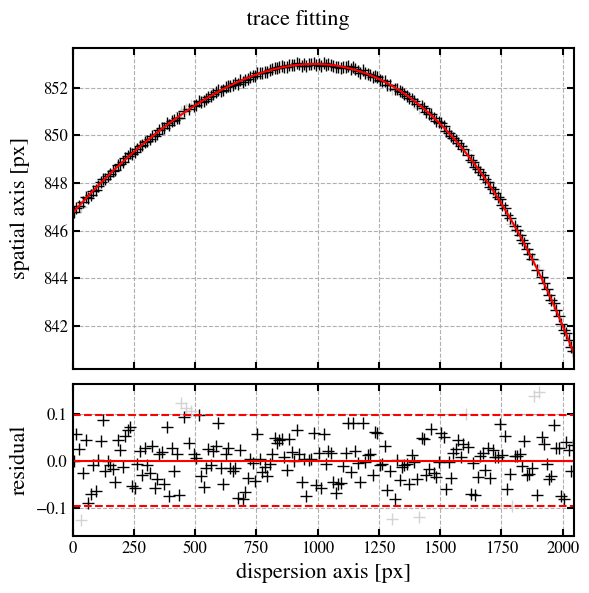

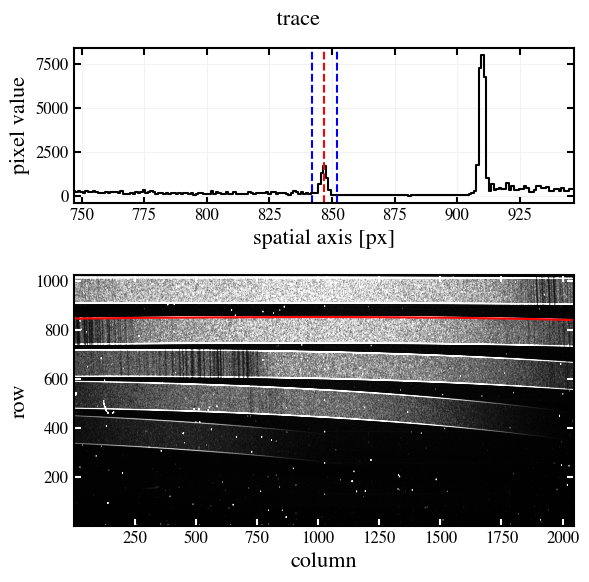

<Spectrum1D(flux=<Quantity [846.73035856, 846.74206359, 846.75375681, ..., 840.87505976,
           840.84883452, 840.82257278] pix>, spectral_axis=<SpectralAxis [0.000e+00, 1.000e+00, 2.000e+00, ..., 2.045e+03, 2.046e+03, 2.047e+03] pix>)>

In [7]:
trace(
    ccd=diff, slit_along='col', fwhm=10, method='trace', n_med=10, reference_bin=0, interval=(800, 900), 
    n_piece=5, n_iter=2, sigma_lower=2, sigma_upper=2, grow=False, title='', show=True, save=False)

In [2]:
from glob import glob
from astropy.stats import mad_std
from drpy.batch import CCDDataList
from drpy.twodspec import align, trace, background, extract
from drpy.plotting import plotSpectrum1D

ccdlist = CCDDataList.read(sorted(glob('*_SPECLTARGET_C2022E2_slit18_385LP_G4_corrected.fits')), hdu=0, unit=None)

targ_list_aligned = align(ccdlist, 'col', index=0)
target = targ_list_aligned.combine(
    method='average', sigma_clip=True, sigma_clip_low_thresh=3, 
    sigma_clip_high_thresh=3, sigma_clip_func=np.ma.median, 
    sigma_clip_dev_func=mad_std, mem_limit=500e6)

INFO: splitting each image into 2 chunks to limit memory usage to 500000000.0 bytes. [ccdproc.combiner]


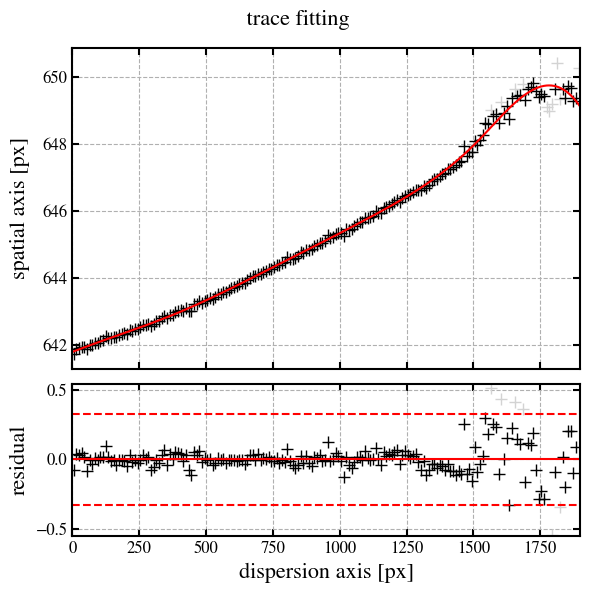

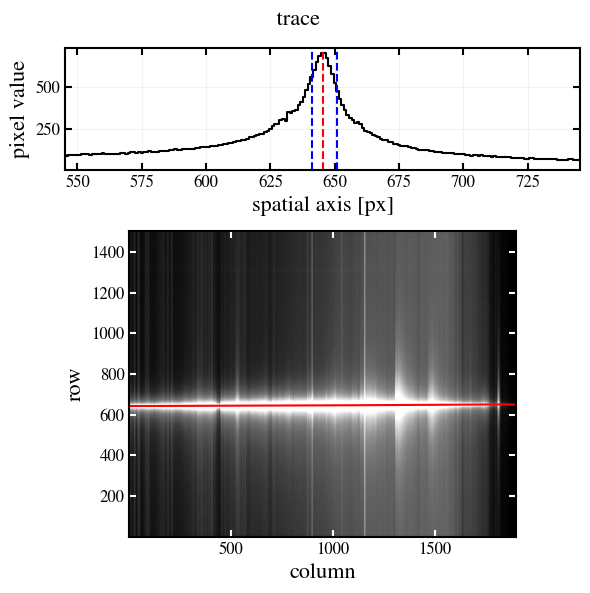

In [3]:
trace_target = trace(
    ccd=target, slit_along='col', fwhm=10, method='trace', interval=None, 
    n_med=10, n_piece=5, n_iter=2, sigma_lower=2, sigma_upper=2, grow=False, 
    title='', show=True, save=False)

In [53]:
background_target = background(
    ccd=ccdlist[0], slit_along='col', trace1d=trace_target, distance=(300, 500), 
    aper_width=100, degree=1, n_iter=5, sigma_lower=3, sigma_upper=3, grow=False)

target_background_subtracted = ccdlist[0].subtract(
    background_target, handle_meta='first_found')

In [25]:
import ccdproc
from astropy.nddata import CCDData

CCDData.subtract(operand=target_background_subtracted, operand2=target_background_subtracted)
isinstance(np.float64(1.0), float)
# ccdproc.subtract_bias(target_background_subtracted, target_background_subtracted, c='l')

True

In [18]:
from ccdproc.utils.slices import slice_from_string

slice_from_string('[:665, :]', fits_convention=True)

(slice(None, None, None), slice(None, 665, None))

/home/zrn/anaconda3/lib/python3.9/site-packages/astro_drpy-0.0.1.6-py3.9.egg/drpy/twodspec/longslit.py:1592: RuntimeWarning: overflow encountered in square
  uncertainty_aper[j, i] = np.sum(uncertainty_arr[mask, i]**2)
/home/zrn/anaconda3/lib/python3.9/site-packages/astro_drpy-0.0.1.6-py3.9.egg/drpy/twodspec/longslit.py:1592: RuntimeWarning: invalid value encountered in square
  uncertainty_aper[j, i] = np.sum(uncertainty_arr[mask, i]**2)
/home/zrn/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


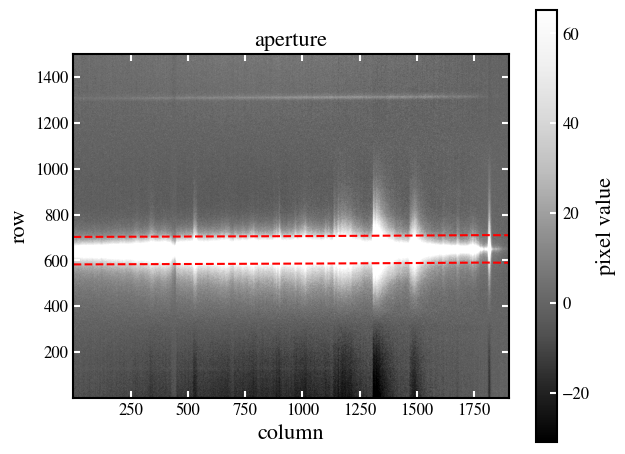

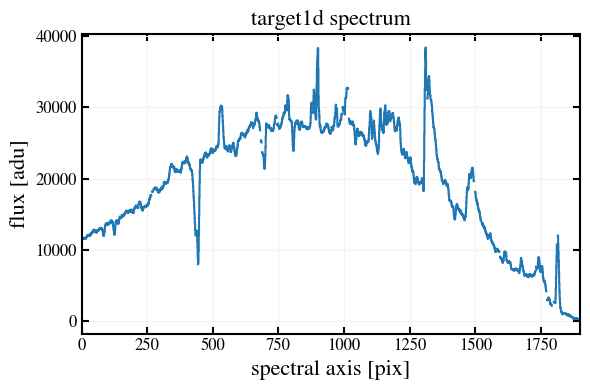

In [81]:
target1d = extract(
    ccd=target_background_subtracted, slit_along='col', trace1d=trace_target, 
    aper_width=(60, 60), method='sum', n_aper=1, show=True, save=False)

# Plot
plotSpectrum1D(
    spectrum1d=target1d, title='target1d', show=True, save=False)

In [32]:
import astropy.units as u

1 * u.one

<Quantity 1.>

In [49]:
target_background_subtracted.data = None

In [63]:
target_background_subtracted.data.dtype = 'float32'

In [66]:
target_background_subtracted.uncertainty.array.dtype = 'float32'

In [79]:
(u.electron**2 / u.electron).is_equivalent(u.electron)

True

In [86]:
target_background_subtracted.unit = 'electron'

In [94]:
with fits.open('./tmp2.fit', 'update') as f:
    for hdu in f:
        hdu.header['BZERO'] = 0.0

In [118]:
from scipy import stats

stats.mode([1,1,1,2,2,3,4,5])

/tmp/ipykernel_26023/728355046.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode([1,1,1,2,2,3,4,5])


ModeResult(mode=array([1]), count=array([3]))

In [116]:
n=9
f'{5:0{n}d}'

'000000005'